In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin
import math

#import warnings
#warnings.filterwarnings("ignore")

import fix_yahoo_finance as yf
yf.pdr_override()

In [384]:
symbols = ["TSLA", "INTC", "BABA", "DIS", "F", "AAPL", "MSFT", "BTC-USD", "ETH-USD"]
market = '^DJI'

start_date = '2018-01-01'
end_date = '2021-05-14'

# Read data 
df = yf.download(symbols,start_date,end_date)
dfm = yf.download(market,start_date,end_date)

df2 = {}
for symbol in symbols:
    df2[symbol] = yf.download(symbol,start_date,end_date)


[*********************100%***********************]  9 of 9 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [385]:
df.tail()

Open              ...      Volume            
                  AAPL        BABA  ...        MSFT        TSLA
Date                                ...                        
2021-05-10  129.410004  222.869995  ...  29299900.0  31392400.0
2021-05-11  123.500000  213.710007  ...  33641600.0  46503900.0
2021-05-12  123.400002  224.740005  ...  36684400.0  33823600.0
2021-05-13  124.580002  213.149994  ...  29624300.0  44184900.0
2021-05-14         NaN         NaN  ...         NaN         NaN

[5 rows x 54 columns]

In [386]:
returns = df['Adj Close'].pct_change()
returns = returns.dropna()
returns.tail()

,AAPL,BABA,BTC-USD,DIS,ETH-USD,F,INTC,MSFT,TSLA
Date,,,,,,,,,
2021-05-10,-0.025805,-0.025654,-0.040742,-0.002921,0.005968,-0.009306,-0.029478,-0.020914,-0.064444
2021-05-11,-0.007410,0.008427,0.015123,-0.014270,0.054755,-0.011102,-0.016616,-0.003843,-0.018822
2021-05-12,-0.024939,-0.006685,-0.133217,-0.021027,-0.091840,-0.021589,-0.025799,-0.029363,-0.044248
2021-05-13,0.017920,-0.062847,0.011509,0.002755,-0.018675,0.019417,0.007273,0.016862,-0.030853
2021-05-14,0.000000,0.000000,0.003306,0.000000,0.097953,0.000000,0.000000,0.000000,0.000000


In [387]:
meanDailyReturns = returns.mean()
print(meanDailyReturns)

AAPL       0.001066
BABA       0.000276
BTC-USD    0.001778
DIS        0.000549
ETH-USD    0.002551
F          0.000263
INTC       0.000404
MSFT       0.001019
TSLA       0.002415
dtype: float64


In [388]:
stdDailyReturns = returns.std()
print(stdDailyReturns)

AAPL       0.018125
BABA       0.019037
BTC-USD    0.039545
DIS        0.017160
ETH-USD    0.050510
F          0.020880
INTC       0.020811
MSFT       0.016471
TSLA       0.035674
dtype: float64


In [389]:
stock_rets = df['Adj Close'].pct_change().dropna()

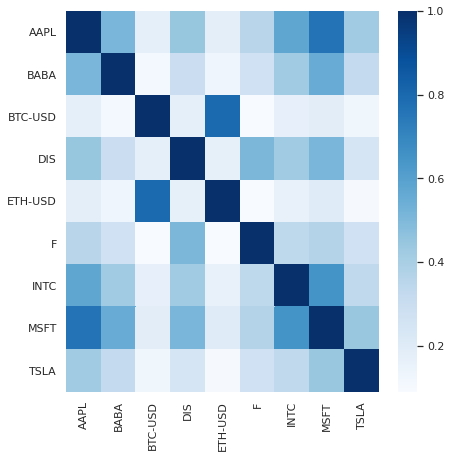

In [390]:

plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

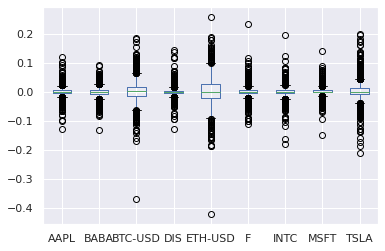

In [391]:

# Box plot
stock_rets.plot(kind='box')

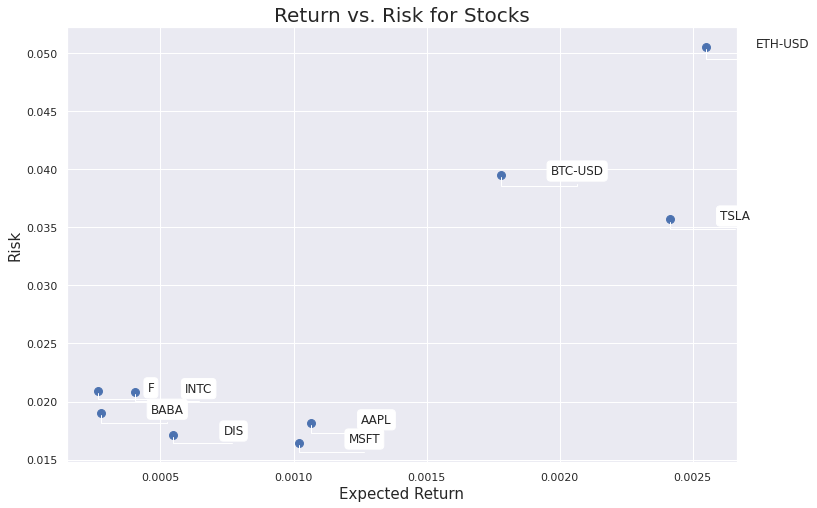

In [392]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [393]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

TSLA     TSLA       1.000000
MSFT     MSFT       1.000000
BABA     BABA       1.000000
BTC-USD  BTC-USD    1.000000
DIS      DIS        1.000000
                      ...   
ETH-USD  TSLA       0.102771
BTC-USD  F          0.093575
F        BTC-USD    0.093575
ETH-USD  F          0.091079
F        ETH-USD    0.091079
Length: 81, dtype: float64

In [394]:

# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.tail()

,AAPL,BABA,BTC-USD,DIS,ETH-USD,F,INTC,MSFT,TSLA
Date,,,,,,,,,
2021-05-10,0.413928,0.476602,0.591875,0.463280,0.628805,0.292618,0.401826,0.436788,0.356916
2021-05-11,0.487962,0.627322,0.691785,0.421856,0.700240,0.287407,0.436067,0.495743,0.468303
2021-05-12,0.417413,0.560488,0.426493,0.397193,0.485590,0.256968,0.411619,0.407611,0.406224
2021-05-13,0.589912,0.312116,0.685321,0.483999,0.592721,0.375987,0.499666,0.567249,0.438929
2021-05-14,0.517788,0.590054,0.670651,0.473943,0.763492,0.319629,0.480303,0.509016,0.514258


In [395]:
Normalized_Value.corr()

,AAPL,BABA,BTC-USD,DIS,ETH-USD,F,INTC,MSFT,TSLA
AAPL,1.000000,0.511917,0.178572,0.447468,0.179971,0.357673,0.579176,0.765641,0.428309
BABA,0.511917,1.000000,0.108844,0.294078,0.133394,0.277051,0.427464,0.554187,0.322955
BTC-USD,0.178572,0.108844,1.000000,0.176618,0.798221,0.093575,0.168220,0.190279,0.129757
DIS,0.447468,0.294078,0.176618,1.000000,0.171446,0.508793,0.422522,0.510477,0.248641
ETH-USD,0.179971,0.133394,0.798221,0.171446,1.000000,0.091079,0.160263,0.201972,0.102771
F,0.357673,0.277051,0.093575,0.508793,0.091079,1.000000,0.341822,0.370418,0.278604
INTC,0.579176,0.427464,0.168220,0.422522,0.160263,0.341822,1.000000,0.648721,0.335539
MSFT,0.765641,0.554187,0.190279,0.510477,0.201972,0.370418,0.648721,1.000000,0.444841
TSLA,0.428309,0.322955,0.129757,0.248641,0.102771,0.278604,0.335539,0.444841,1.000000


In [396]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AAPL       0.001066
BABA       0.000276
BTC-USD    0.001778
DIS        0.000549
ETH-USD    0.002551
F          0.000263
INTC       0.000404
MSFT       0.001019
TSLA       0.002415
dtype: float64
--------------------------------------------------
Stock risks:
AAPL       0.018125
BABA       0.019037
BTC-USD    0.039545
DIS        0.017160
ETH-USD    0.050510
F          0.020880
INTC       0.020811
MSFT       0.016471
TSLA       0.035674
dtype: float64


In [397]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')
table.sort_values(by='Risk')
rf = 0.01
table['Sharpe_Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe_Ratio
AAPL,0.001066,0.018125,-0.492888
BABA,0.000276,0.019037,-0.510812
BTC-USD,0.001778,0.039545,-0.207905
DIS,0.000549,0.017160,-0.550786
ETH-USD,0.002551,0.050510,-0.147471
F,0.000263,0.020880,-0.466312
INTC,0.000404,0.020811,-0.461108
MSFT,0.001019,0.016471,-0.545284
TSLA,0.002415,0.035674,-0.212613


In [398]:
prices = {}
prices_1 = []
for i in df2:
    prices_1 = df['Adj Close']
    prices[i] = prices_1[i] 
values = dfm['Adj Close']

In [399]:
df3 = df["Adj Close"]
df3.tail()

,AAPL,BABA,BTC-USD,DIS,ETH-USD,F,INTC,MSFT,TSLA
Date,,,,,,,,,
2021-05-10,126.849998,219.529999,55859.796875,184.300003,3952.293945,11.71,55.970001,247.179993,629.039978
2021-05-11,125.910004,221.380005,56704.574219,181.669998,4168.701172,11.58,55.040001,246.229996,617.200012
2021-05-12,122.769997,219.899994,49150.535156,177.850006,3785.848633,11.33,53.619999,239.000000,589.890015
2021-05-13,124.970001,206.080002,49716.191406,178.339996,3715.148438,11.55,54.009998,243.029999,571.690002
2021-05-14,NaN,NaN,49880.535156,NaN,4079.057373,NaN,NaN,NaN,NaN


Text(0, 0.5, 'price in $')

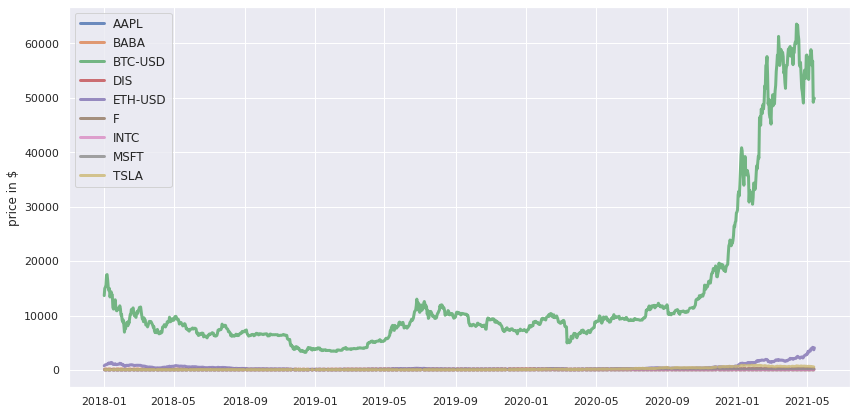

In [400]:
plt.figure(figsize=(14, 7))
for c in df3.columns.values:
    plt.plot(df3.index, df3[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'price in $')

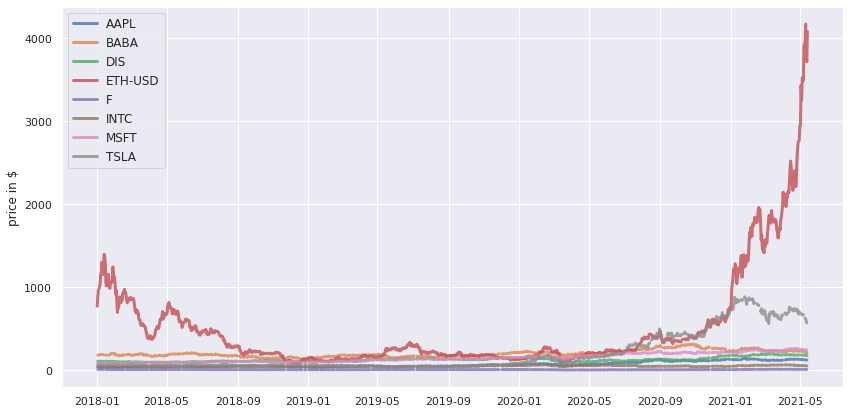

In [401]:
plt.figure(figsize=(14, 7))
for c in df3.columns.values:
    if c!="BTC-USD":
        plt.plot(df3.index, df3[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'price in $')

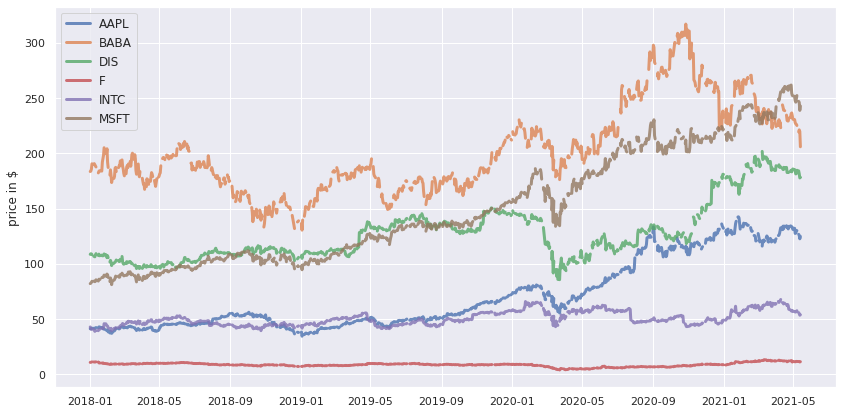

In [402]:
plt.figure(figsize=(14, 7))
for c in df3.columns.values:
    if c!="BTC-USD":
      if c!="ETH-USD":
        if c!="TSLA":
          plt.plot(df3.index, df3[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

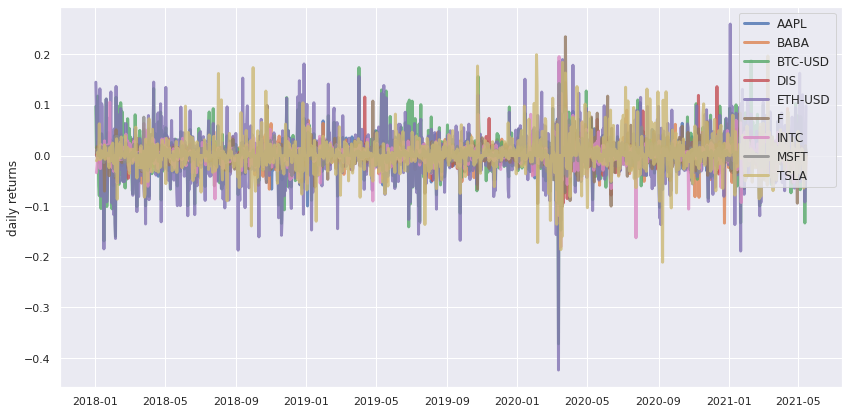

In [403]:
returns = df3.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

Text(0, 0.5, 'daily returns')

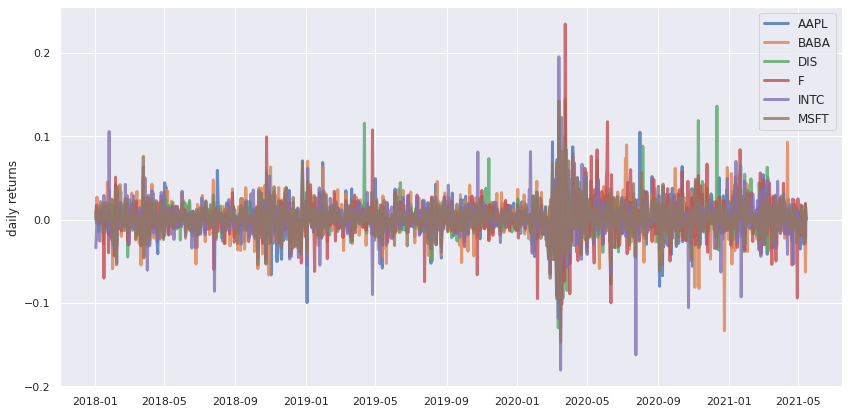

In [404]:
returns = df3.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    if c!="BTC-USD":
      if c!="ETH-USD":
        if c!="TSLA":
          plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [405]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [406]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate,col):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(col)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [407]:
returns = df3.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 30000
risk_free_rate = 0.0178

In [408]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate,col):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate,col)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df3.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df3.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.4
Annualised Volatility: 0.3


             AAPL  BABA  BTC-USD   DIS  ETH-USD     F  INTC   MSFT   TSLA
allocation  13.94  2.32     9.92  7.83    12.81  2.33  3.18  21.76  25.92
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.16
Annualised Volatility: 0.21


            AAPL   BABA  BTC-USD   DIS  ETH-USD      F  INTC   MSFT  TSLA
allocation  0.41  24.03     6.18  34.8      0.0  11.64  1.32  21.33   0.3


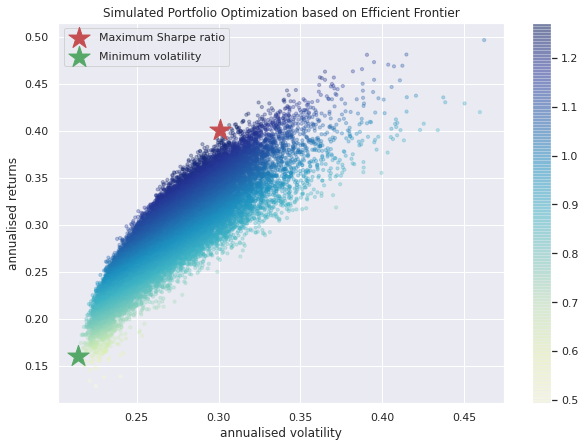

In [409]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate,len(df3.columns))

In [410]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [411]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [412]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [413]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate,col):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate,col)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df3.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df3.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.46
Annualised Volatility: 0.33


             AAPL  BABA  BTC-USD  DIS  ETH-USD    F  INTC   MSFT   TSLA
allocation  18.75   0.0     1.46  0.0    19.09  0.0   0.0  27.05  33.65
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.16
Annualised Volatility: 0.21


            AAPL   BABA  BTC-USD    DIS  ETH-USD      F  INTC   MSFT  TSLA
allocation  7.78  22.51     5.07  29.08      0.0  13.81  2.77  18.96   0.0


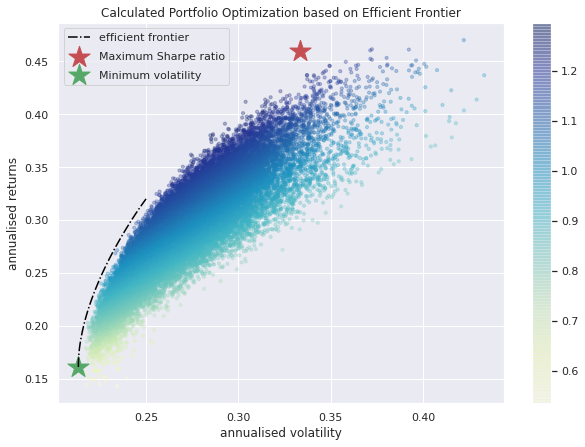

In [414]:
import scipy.optimize as sco
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate,len(df3.columns))



In [415]:
del df3['BABA']
del df3['DIS']
del df3['BTC-USD']
del df3['INTC']

returns = df3.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 30000
risk_free_rate = 0.0178

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.46
Annualised Volatility: 0.33


             AAPL  ETH-USD     F   MSFT   TSLA
allocation  24.35    20.38  0.04  23.29  31.94
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.24


             AAPL  ETH-USD      F   MSFT  TSLA
allocation  19.69     1.21  32.88  45.79  0.42


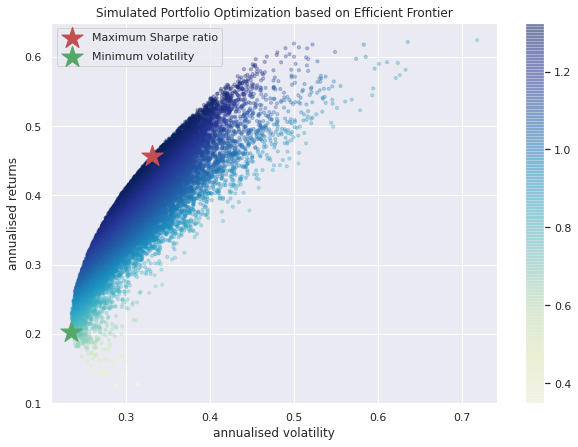

In [416]:
col = len(df3.columns)
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate,col)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.46
Annualised Volatility: 0.33


             AAPL  ETH-USD    F   MSFT   TSLA
allocation  18.92    20.08  0.0  27.17  33.83
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.23


            AAPL  ETH-USD      F   MSFT  TSLA
allocation  18.7     2.99  29.22  49.09   0.0


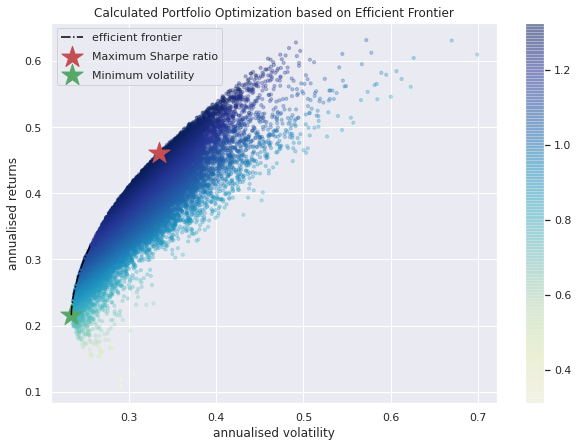

In [417]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, col)